# Análisis en Componentes Independientes (ICA)

### [Julio Waissman Vilanova](http://mat.uson.mx/~juliowaissman/)

***

Una libreta de Jupyter modificada sobre la libreta desarrollada por 
***Shashwat Shukla*** and ***Dhruv Ilesh Shah***

https://github.com/riddhishb/ipython-notebooks

***


# Motivación

## El problema de la fiesta (*cocktail party problem*, CPP)

Imaginemos que nos encontramos en una fiesta donde hay $n$ personas hablando, y a lo largo del salón hay $n$ microfonos diferentes. Cada microfono recibe el sonido de todas las personas de la reunion, pero en cada uno la magnitud del sonido de cada invitado es diferente. 

![Cocktail Party Problem](imagenes/cocktail_1.png)
<center>(imágen recuperada de http://blog.csdn.net/muzilanlan/article/details/45917627)</center>




El problema CPP se puede establecer como sigue: 

> Dado un número de $m$ señales de sonido obtenido a partir de $m$ micrófonos
> colocados en diferentes lugares, y suponiendo que el sonido grabado proviene
> de $m$ fuentes (individuos) diferentes (colocados en diferentes lugares), 
> encontrar las fuentes originales de sonido.

Para este problema se hacen una serie de hipótesis importantes:

1. Existen tantos micrófonos como fuentes de sonido. Esto es importante para asegurar que el
   sistema a resolver se ecuentra *críticamente determinado* y no *subdeterminado* (más individuos que 
   micrófonos), o sobredeterminado (más micrófonos que individuos).
   
2. Cada micrófono graba una combinacion rasonablemente distina de las señales originales (conversaciones). Esto es,
   los microfonos se encuentran distribuidos en la sala, y por lo tanto se asume que lo que graba cada micrófono 
   es una combinación lineal de las amplitudes de onda de las señales de las diferentes combinaciones. Esta hipótesis
   es muy importante, porque se está afirmando que los $m$ micrófonos forman un conjunto de $m$ combinaciones
   lineales de las señales, las cuales son linealmente independientes entre si.
   
3. Las señales provenientes de las fuentes (individuos) son **estocásticamente independientes entre sí**. Este es 
   un paso clave, y es muy razonable, al pensar que cada persona genera una señal de sonido que se espera
   estocásticamente independiente de la señal que generan las otras conversaciones.
   
   
## Planteamiento del problema (genérico para ICA)

La señal recibida por el micrófono $i$, $i \in {1, 2, \ldots, m}$ se le va a llamar $X_i$ y a la magnitud de la señal en el muestreo $j$ como $X_i^j$. Así, si se tienen grabadas $N$ muestras, cada señal es un vector de dimensión $N$ y el conjunto de las $m$ señales se puede representar como una matriz $X$ de dimensión $(m \times N)$ donde cada renglon de la matriz $X$ representa una señal grabada por un micrófono.


Definamos ahora el conjunto de señales originales (*sources* en inglés) como la matriz $S$ de dimensión $(m \times N), de tal forma que $S_i$ es el i-ésimo renglon de $S$, el cual representa la i-ésima señal de origen. Ten en cuenta que en ICA, el orden de las fuentes (o de lo que se mide) no importa, al ser imposible poder obtener el orden de las señales con los métodos existentes. $S_i^j$ es entonces la amplitud de la i-ésima señal, en el periodo de muestreo $j$.

A partir de las ideas descritas, vamos a asumir que la señal medida en realidad proviene de una combinación lineal de las señales originales, donde desconocemos tanto a las señales originales como a la forma en que se mezclaron. De esta idea podemos decir que
$$
X = AS,
$$
donde $A$ es una matriz de $(m \times m)$ conocida como *matriz de mezclado*. El objetivo de ICA es encontrar una matriz $W$ de dimensiones $(m \times m)$ tal que 
$$
S = WX,
$$
donde a $W$ se le conoce como *matriz de desmezclado*.

![The Problem](imagenes/cocktail_2.jpg)
<center>(obtenido en http://www.nocions.org/research/independent-component-analysis-ica-/)</center>





## Outline of solution

Our objective is to find the matrix **W**. As we have assumed that the number of microphones is equal to the number of independent conversations, it turns out that the matrix **A** is invertible and hence **W** is just the inverse of **A**. 

Hence, it suffices to find **A**. We will employ [Singular Value Decomposition(SVD)](https://www.wikiwand.com/en/Singular_value_decomposition) on the matrix **A**.

![SVD](Notebook/SVD.gif)
<center>Courtesy: Wikipedia</center>
Hence, $A = UDV^{*}$ for orthogonal matrices **U**, **V\*** and diagonal matrix **D**. 

Note that **V\*** is the conjugate transpose of **V**. Here the conjugate transpose is equivalent to the transpose because we are only dealing with real signals and their linear combinations.

We will then determine each of **U**, **D**, **V\*** by considering the covariance matrix of **x** and exploiting the independence of the source signals.

The details follow.
***

## Covariance

An important term in the concept of statistics is *covariance*, which is a measure of how much two random variables change _together_. Covariance provides a measure of the strength of the correlation between two or more sets of random variates. The covariance for two random variates X and Y, each with sample size N, is defined by the expectation value:
$$ cov (X,Y)=\langle(X-\mu_x)(Y-\mu_y)\rangle\\=\langle X \rangle \langle Y \rangle-\mu_x \mu_y$$
where $\mu_x = \langle X \rangle$ and $\mu_y = \langle Y \rangle$ are the respective means.  
For uncorrelated variates, $ \langle X Y \rangle = \langle X\rangle\langle Y\rangle $ and hence,
$$ cov(X,Y)=\langle XY\rangle-\mu_x \mu_y=\langle X\rangle\langle Y\rangle-\mu_x \mu_y=0 $$
However, if the variables are correlated in some way, then their covariance will be nonzero. In fact, if $cov(X,Y)>0$, then Y tends to increase as X increases, and if $cov(X,Y)<0$, then  Y tends to decrease as X increases. Note that while statistically independent variables are always uncorrelated, the converse is not necessarily true.

As you can see, covariance can be a good metric to analyse the dependence of two datasets. To read more about covariance, follow [this link.](http://mathworld.wolfram.com/Covariance.html)

As a special case, substituting $ X = Y $  gives $$cov(X,X) = \langle X^2 \rangle - \langle X \rangle ^2 \\ =\sigma^2_X$$
where $\sigma_X$ denotes the _standard deviation_. Thus, $cov(X,Y)$ reduces to the statistical variance for this case.


Given a dataset vector $X$ _(nx1 vector)_, the covariance of $X$ is given by $$ C_x= (X-\mu_x)(X-\mu_x)^T $$
This matrix $C_x$ has very interesting properties, which we will be exploiting in the upcoming sections. This [document](http://www.robots.ox.ac.uk/~davidc/pubs/tt2015_dac1.pdf) would be an interesting read.
***

## PCA vs ICA

Now that we have seen what PCA is, let us see how it can be applied in our case - if at all.  
We have seen that the basis on which PCA separates out the components is *orthogonality* and *variance*. Drawing parallels to the Cocktail Party Problem, there seems to be an issue. Orthogonality sure is a measure of independence of two datasets (vectors), but it is not the only measure and as it turns out, it is not applicable in the case of CPP. Two different sound signals need not be orthogonal, even if they are independent and this can be seen by simply generating a counter example. _(Here, orthogonal refers to **zero** inner product.)_ The very fact that independent signals needn't be orthogonal eliminate the possibility of using PCA. Further, PCA identifies the separated components on the basis of _variance_, which according to Information Theory is a very shallow metric for decorrelating components. Statistical independence of the third or fourth order is generally preferred as a metric - what this means is that we must study deeper features and analyse correlations, but let's leave that for now.   
Given below is the simplest way to illustrate how PCA fails due to the orthogonality condition on principle components. ![PCAvICA](http://i.stack.imgur.com/ySEOY.png)
<center>Courtesy: University of Colorado Lectures</center>
Despite the two branches being independent, PCA would not identify them so because it doesn't separate out _independent_ components, but _principle_ ones based on orthogonality and variance measures. ICA, as the name suggests, looks for _independent_ components and not any dependent variable - hence avoiding side-effects! How it does this is by using a metric for ***statistical independence***, described later, and then picking a model that minimizes this dependence. Before we can get to that, let's look at the pre-processing to be done on the data to ensure optimal results in ICA. 
***

## Preprocessing for ICA

First, let us consider the basic statement of ICA. $$ x = As \\ s = Wx $$ Where $s$ refers to the source signals, $A$, the _mixing matrix_ and $x$, the signal we receive at microphones(say) and $W = A^{-1}$ 
Given below are the pre-processing stages performed:
* **Centering**: The most basic and necessary preprocessing is to center ${\bf x}$, i.e. subtract its mean vector  ${\bf m = E\{x\}}$ so as to make ${\bf x}$ a zero-mean variable. This also implies that ${\bf s}$ is a zero-mean variable, as can be seen by taking expectation on both sides, above. This preprocessing is made solely to simplify the ICA algorithms: It does not mean that the mean could not be estimated. After estimating the mixing matrix ${\bf A}$ with centered data, we can complete the estimation by adding the mean vector of ${\bf s}$ back to the centered estimates of ${\bf s}$. The mean vector of ${\bf s}$ is given by  ${\bf A}^{-1}
{\bf m}$, where ${\bf m}$ is the mean that was subtracted in the preprocessing.


* **Whitening**: Another useful preprocessing strategy in ICA is to first whiten the observed variables. This means that before the application of the ICA algorithm (and after centering), we transform the observed vector ${\bf x}$linearly so that we obtain a new vector  $\tilde{{\bf x}}$ which is white, i.e. its components are uncorrelated and their variances equal unity. In other words, the covariance matrix of  $\tilde{{\bf x}}$ equals the identity matrix. A _whitening transformation_ is a linear transformation that transforms a vector of random variables with a known covariance matrix into a set of new variables whose __covariance is the identity matrix__ meaning that they are uncorrelated and all have _variance unity_. $$ C_{\tilde{x}} = \tilde{x}\tilde{x}^T = I $$ The math behind whitening involves a greater understanding of eigenvectors and matrices, which we shall ignore for the purpose of this tutorial. Let us fast-forward to how whitening can be done on a given dataset. The whitening transformation is always possible. One popular method for whitening is to use the [eigen-value decomposition (EVD)](http://mathworld.wolfram.com/EigenDecomposition.html) of the covariance matrix  $C_{\tilde{x}} ={\bf E}{\bf D}{\bf E}^T$, where ${\bf E}$ is the orthogonal matrix of eigenvectors of  $ C_{\tilde{x}} $ and ${\bf D}$ is the diagonal matrix of its eigenvalues,  ${\bf D}= \mbox{diag}(d_1,...,d_n)$. Note that  $E\{{\bf x}{\bf x}^T\}$can be estimated in a standard way from the available sample $x(1),...,x(T)$. Whitening can now be done by $$ \tilde{x} = ED^{-1/2}E^Tx$$
where the matrix  ${\bf D}^{-1/2}$is computed by a simple component-wise operation as  ${\bf D}^{-1/2}=\mbox{diag}(d_1^{-1/2},...,d_n^{-1/2})$. It is easy to check that now  $C_{\tilde{x}}={\bf I}$.

It is important to note that the whitening transformation changes the matrix $A$ corresponding to the $x$, and hence $$ \tilde{x} = ED^{-1/2}E^TAs = \tilde{A}s$$
The utility of whitening resides in the fact that the new mixing matrix  $\tilde{{\bf A}}$ is orthogonal. How this affects the data is a little complicated to explain, but I will attempt to illlustrate it below.  
Consider a two-dimensional dataset as given below, with _uncorrelated/independent_ variables, along the sides of the parallelogram. ![Before Whitening](http://sccn.ucsd.edu/~arno/ica/m1m2whit.jpg)
<center> [Swartz Center for Computational Neuroscience](http://sccn.ucsd.edu)</center>
Evidently, this data has the two independent vectors as the sides of the parallelogram, but when passed into the algorithm, since the vectors are not orthogonal, they might end up showing unnatural dependencies which may not really exist. Hence, we perform whitening of the data to give something that looks like this: ![After Whitening](http://sccn.ucsd.edu/~arno/ica/whiten.jpg)
<center> Courtesy: [Swartz Center for Computational Neuroscience](http://sccn.ucsd.edu)</center>
Note that we haven't lost any __information__ in the above transformation, nor have we created or destroyed any existing correlations. But this new dataset ($\tilde{x}$) is bound to perform better on ICA algorithms. In the rest of this tutorial, we assume that the data has been preprocessed by centering and whitening. For simplicity of notation, we denote the preprocessed data just by ${\bf x}$, and the transformed mixing matrix by ${\bf A}$, omitting the tildes.
***

## Statistical Independence

This section gives a brief description of statistical independence and it's interpretation in the context of this problem. 
Recall how we looked at an intuitive explanation. We said that voices are independent because listening to one won't allow us to predict the other. 

To exploit this property mathematically, we construct the **probability density functions(pdf)** for each of the signals that our **m** microphones have recorded. 

Why would we ever think of doing that? Well, for a number of pragmatic reasons. Statistical methods that work with density functions are very well developed and extremely powerful. 

It also makes the math simpler. How you ask? 

Well, notice that if we are representing a signal by it's probability density function *alone*, we are saying that at any given time, the value of **the signal is simply a draw of a random variable with this particular pdf.** (What this means is that we are basically discarding/not keeping track of the local correlation of the signal's contiguous values.)

In the context of the Cocktail Party Problem, we use pdfs to quantify statistical independence. There are many ways of quantifying the independence of two random variables if their pdfs are known. This is why we are working with probability density functions. 

Here comes an extremely important point: While solving the Cocktail party problem, we assume that all the source signals that we wish to recover are non-Gaussian.

First of all, what do we mean by that? We mean that the pdf of each source signal is not a Gaussian function/distribution.

This might seem like an arbitrary and questionable assumption at first. 

We invoke Information theory to justify our assumption. Simply put, there is a result in Information theory that says that the **Gaussian distribution has the greatest possible entropy (for a fixed variance of the distribution).** Entropy in our context is just disorder. The source signals do have order, as they contain lots of information. If they were purely Gaussian, then the signals would just sound like (Gaussian) noise. 

We are not going to prove this result here. The mathematics is very involved and doesn't really shed any light on the present problem. However, an intuitive understanding of why this result *should be right* can be acquired by considering the famous Galton box(bean machine).

![Galton Box GIF](http://i.makeagif.com/media/10-20-2015/smUCoA.gif)
![Galton Box](Notebook/galton_board.jpg)
<center>Courtesy:http://tyulpinova.ru/normal_distribution/#</center>
This is the epitome of a random process(that contains no information) and the fact that it has a Gaussian distribution is confirmation(if not justification) of the fact that the Guassian distribution has the greatest entropy. 


Hence we assume that the original source signals have non-Gaussian distributions.

This revelation about the nature of the pdfs of the source signals actually allows us to solve the entire problem! We reiterate that each of the recorded signals is a linear sum of the original source signals. We now invoke the **Central Limit Theorem**.

The central limit theorem says that the pdf (of the average) of the sum of independent random variables, tends to a Gaussian distribution, as the number of random variables tend to infinity. Why is this important here? Well, we have assumed that the source signals are non-Gaussian independent variables and that the recorded signals are linear weighted sums of these non-Gaussian variables. By the Central Limit Theorem, the sum of non-Gaussian variables is more Gaussian than the individual variables. Hence, the recorded signals are more Gaussian than the source signals!  

We finally have a way to recover our original signals. Remember that we are trying to *linearly transform* the recorded signals back to the source signals. Thus, now we have to just find the linear transformation that minimises the "Gaussian nature" of the transformed signals. The signals that have the least "Gaussian nature" simply correspond to our source signals.

Notice that I have put "Guassian nature" in quotes. This is because we have not yet quantified deviations from a Gaussian distribution. Indeed, this is precisely where FOBI and fastICA (and other ICA implementations) differ from one another. The steps that we have outlined in the previous sections apply to both. But the subsequent sections elucidate two different approaches to quantifying deviations from a Gaussian distribution and the details of the solutions to the Cocktail Party Problem formulated based on them.
***

## <font color='blue'>fastICA</font>

The first method that we will be discussing is known as the fastICA which uses two important algorithms used widely in numerical analysis - _gradient descent_ and _fixed-point iteration_. An understanding of both these is very important and hence we shall be discussing these before we encounter the actual algorithm. As a brief, we must estimate the matrix $W$ such that the source matrix $s = Wx$ has minimum _'statistical dependence'_. To quantify the stastical dependence/independence, we use the concept of a _cost function_. We must choose the matrix $W$ which minimises the cost function, and hence maximises statistical independence. Fasten your seat belts, as we dive into the world of _Machine Learning_ and tackle the topics one at a time, eventually solving the Cocktail Party Problem. 

### Gradient Descent
Let's assume we are given a function $f(x, y)$ , like the one given below, and an operation - say, to find the minima (or maxima) of the function over a domain.

![](http://www.network-graphics.com/images/calculus/local_min_max_m.jpg)
<center> Courtesy: [http://www.network-graphics.com/images/calculus](http://www.network-graphics.com/images/calculus) </center>

With a small amount of data, known function $f$ and just two variables $(x,y)$ itself, the problem can become difficult to solve algebraically. Simply computing minimas of a complex function comprising of exponential and trigonometric terms can become highly complex and computationally expensive; also, the solution is dependent on the type of function we wish to optimise, and here comes the need of a more generalised algorithm.  


Come in, _gradient descent_! Let us now try to intuitively form an algorithm to solve such optimisation problems without any dependence of the function $f$, albeit some necessary conditions. Given that the function is continuously differentiable, we can claim that a minima is the point where the function is decreasin, no matter which direction you come from (similarly, maxima is where function is increasing no matter which direction you come from). In the given illustration , given a point $p_i$ or $(x,y)$ in the two-dimensional plane, and its gradient $\nabla f(p_i)$, if we could somehow follow the slope of the function, we could slide down all the way to a minima (or climb up to a maxima) and the value of function $f$ at that point would be the required optimised value.

A simple way to look at this is to imagine a hill, or a complex terrain just like the illustration. Say, you are sitting at a point on the terrain and wish to reach the bottommost/topmost point in your _neighbourhood_. For the minima of potential energy, for example, you could simply let gravity do the talking and slide down, in whichever direction it takes you, until you reach _one of the_ minimas in your neighbourhood. What you just actuated, is known as gradient descent!

![](http://sebastianraschka.com/images/faq/closed-form-vs-gd/ball.png)
![](https://codesachin.files.wordpress.com/2015/12/gradient_descent_1.png)
<center>Courtesy: [Sachin Joglekar's Blog](https://codesachin.files.wordpress.com)</center>
In practice, it involves moving a small distance in the direction of gradient (inreasing or decreasing, based on the optimisation objective), until convergence. Note that we cannot be certain of landing at the actual minima, but we end up converging in the neighbourhood. The distance is controlled by a parameter $\alpha$, known as the step-size. Optimising this $\alpha$ is important because a large $\alpha$ can cause overshooting and failure in convergence, and a small $\alpha$ can slow down the process and make it computationally expensive. This can be tackled in two ways.
* Running the algorithm multiple times and choosing an $\alpha$ that gives good results (a value of 0.3 to 2 should do fine). In fact, a good implementation of learning would be to provide the program with a range of $\alpha$s, say [0.01:10] on a logarithmic scale and making the system _learn_ the best parameter. _(This would require some background in Supervised ML and hence we leave this for you to explore!)_
* Another smart way to do this efficiently would be to make $\alpha$ dependent on the error of convergence (values of $f$ between two iteration), ideally the difference. This way, $\alpha$ automatically decreases as we get closer to the optimisation point. This _adaptive_ model is generally a better way to implement gradient descent as it guarantees fast convergence in a simplistic way.

An important feature of gradient descent is that we can extend the algorithm to any n-dimesional space. We use 2-D to visualise it because visualising higher dimesional spaces can be complicated, almost impossible. But on extending the feature vector $X(x_1, ..., x_n)$ and a scalar function $f(X^i)$, this algorithm works just as well. **It must be noted that of the various drawbacks gradient descent may have, the most important one is perhaps the fact that it converges to _an_ optima, that is, a _local optima_ and not necessarily the global optima.** This can become a major issue with complicated functions, which may have multiple possible local optima. It is also possible that the algorithm converges to different optimas on different runs, depending on the starting point.


![An example of the issue.](http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr_files/Image%20[16].png)
<center>Courtesy: www.holehouse.org</center>

In advanced machine learning, we use more complex optimisation tools in scientific packages like SciPy, MATLAB etc. (_fminuc, fmincg etc._) We can ignore such complexities and assume that a run of gradient descent gives us the desired optima because of our choice of _cost function_ (Coming Soon!).

_That is all you need to know about gradient descent for this tutorial! Feel free to explore this topic further if you are interested. Gradient Descent has a wide range of applications in numerical analysis, the most exciting of which is in Machine Learning and Artificial Neural Networks!._

### Fixed-Point Iteration

Next up, we talk about another famous numerical solving technique known as the fixed-point iteration method. Given an expression $f(x)=0$, where $x$ can be a scalar or a vector, it is not always possible to solve it by standard methods. Consider the following equation. $$ e^{x^2} - tan(x) + x = 0 $$
It is not possible to solve such an equation directly, and thus we must use a method that can allow us to find a numeric solution. In general, the given function $f(x)$ can be anything and it would be nice if the method is independent of $f$. Consider the example of gradient descent above. We talked about what we would have to do, but how really would you take _steps_ and _move_ along the gradient? This is where the need of a solving method comes in. For now, let us consider solving an equation rather than an optimisation problem.  

The FPI aims at solving the problem, as the name suggests, _iteratively_. The first step is to convert an equation of the form ${\bf f(x)=0}$ to the form ${\bf x = g(x)}$ so that we can update the parameter ${\bf x}$ directly. Let's tackle this with the help of an example. Let's say we want to find the roots of an equation $ x^4 - x - 10 = 0 $. We must first convert this into the form $x = g(x)$ to apply FPI. Some possible cases are $g_1(x)=x^4-10, g_2(x)=(x+10)^{1/4}, $$g_3(x)=(x+10)^{1/2}/x $  etc. It is intuitively evident that since we want convergence and run an iteration, the function $g_i(x)$ better be a converging function, and hence$g_1(x)$ is not a good function to use.

The algorithm next involves iterating upto convergence, the following expression: $$ x_{n+1}=g(x_n) $$ given the function $g(x)$. We run this iteration untill the sequence converges, i.e., $x_{n+1} - x_n < \epsilon$, where $\epsilon$ or tolerance is a small number.

An important parameter that we must consider is the extent of convergence, or tolerance $\epsilon$. It defines how close two consecutive values of $f$ must be, before we assume that convergence has occured. Choosing a value between $10^{-4}$ to $10^{-2}$ should work fine. Very small $\epsilon$ may take too long to converge, or not converge at all, and a large $\epsilon$ may give unsatisfactory results.

Let us look at a simple example with the function defined above, and $g(x) = (x+10)^{1/4}$. We make an initial guess of $x_0 = 1.0$
$$ x_1 = (x_0+10)^{1/4} = 1.82116 \\ x_2 = (x_2+10)^{1/4} = 1.85424 \\ x_2 = (x_1+10)^{1/4} = 1.85558 \\
x_3 = (x_2+10)^{1/4} = {\bf 1.85558} $$

Similarly, starting with $x_0 = 4.0$, we get:
$$ x_1 = (x_0+10)^{1/4} = 1.93434 \\ x_2 = (x_2+10)^{1/4} = 1.85866 \\ x_2 = (x_1+10)^{1/4} = 1.8557 \\
x_3 = (x_2+10)^{1/4} = 1.85559 \\ x_4 = (x_3+10)^{1/4} = {\bf 1.85558} $$ defined as the normalized form of the fourth central moment of a distribution2

This way, we can solve an equation, indirectly, without worrying about the nature of the roots and the function itself. This is method in some very famous numerical methods like the [Newton-Raphson's Method](http://www.sosmath.com/calculus/diff/der07/der07.html). Note that this method again finds _one of the roots_ and can find different roots depending on seeding point.



### The Cost Function

We've talked all about optimising the function and solving for its optimal value and roots etc. _But hey!_ In the problem that we were discussing where is this ___function___? In this section we'll see how we can choose a function, whose optimisation gives us the desired result - separated sources.

In any optimisation problem of this sort, we talk about a term called the __cost__, which (in the case of a minimisation) is analogous to the price you are paying by deviating from ideal results. A similar analogy can be thought of for maximisation. Hence, we must quantify the property _statistical dependence_ and minimise it for the sources to be best separated. _Note that the ideal case of perfect separation can generally not be attained due to various limitations_. So, how do we quantify this dependence, or _Gaussianity_, as discussed in the last topic?
* __Kurtosis__ is defined as the normalized form of the fourth central moment of a distribution. $$ kurt(x)=E(x^4) - 3(E(x^2))^2 $$ If we assume $x$ to have zero mean  $\mu_x=E\{x\}=0$ and unit variance  $\sigma^2_x=E\{x^2\}-\mu_x^2=1$, then $E\{x^2\}=1$ and  $kurt(x)=E\{x^4\}-3$. Kurtosis measures the degree of peakedness (spikiness) of a distribution and it is zero only for Gaussian distribution. Any other distribution's kurtosis is either positive if it is supergaussian (spikier than Gaussian) or negative if it is subgaussian (flatter than Gaussian). Therefore the absolute value of the kurtosis or kurtosis squared can be used to measure the non-Gaussianity of a distribution. However, kurtosis is very sensitive to outliers, and it is not a robust measurement of non-Gaussianity. ![](http://fourier.eng.hmc.edu/e161/lectures/figures/kurtosis.gif)
<center>Courtesy: [Harvey Mudd College](https://www.hmc.edu/) Lectures</center>
Hence, maximising this _kurtosis_ function can be our optimisation objective!

* __Differential Entropy _(Negentropy)___: Entropy is a very complex concept, which we wish to skip here, but as a fact, an important result in Information Theory states that the Gaussian Distribution the maximum entropy among all distributions over the entire real axis  $(-\infty,\infty)$. Thus, it can be used as a measure of _Gaussianity_. For more information on this, you can refer to [this site](http://fourier.eng.hmc.edu/e161/lectures/ica/node4.html).

### fastICA Algorithm

Pheww! That was long! Now let's finally take a look at the fastICA algorithm in a brief manner.

1. Obtain the data matrix $x$.

2. Subtract off the mean to center $x$.

3. Whiten the matrix $x$ to obtain the matrix $x^T$.
1. Choose a random guess for the initial value of the de-mixing matrix ${\bf w}$.
2. Iterate the following: $$ w \gets E(xg(w^Tx)) - E(g'(w^Tx))w $$ You will realise that this step is in fact the implementation of gradient descent using fixed-point iteration, as discussed above! The function $g$ is a function used to capture higher order features of the matrix $w^Tx$ and is similar to capturing the negentropy.
3. Normalize ${\bf w}$ $$ w \gets w/{\|w\|} $$
4. If not converged, go back to 2.

Convergence can be judged by the fact that an ideal $w$ would be orthogonal, and hence $w_i^Tw_{i+1}$ would $\approx 1$. We thus use this condition to examine convergence.

The gradient descent step uses a function $g$ which can be a function like $cosh(x)$ or $tanh(x)$ which capture higher order correlations and hence we finally aim to maximise the function $\Sigma E(g(y_i))$ where $y_i = {\bf w_i^Tx}$ is a component of ${\bf y = Wx}$.

Sampling rate= 8000
Data type is uint8
Number of samples: 50000


Text(0.5,1,'Whitened data')

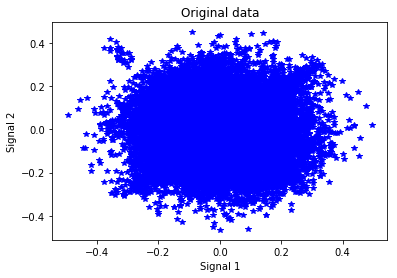

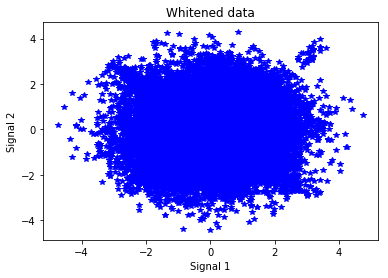

In [9]:
%matplotlib inline

"""
Cocktail Party Problem solved via Independent Component Analysis.
The fastICA algorithm is implemented here,
using negentropy as a measure of non-gaussianity.
"""
# Import packages.
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.io import wavfile
from scipy import linalg
from numpy.random import randn as RNDN

def g(x):
    out = np.tanh(x)
    return out

def dg(x):
    out = 1 - g(x) * g(x)
    return out

# Dimension
dim = 2

# Input the data from the first receiver.
samplingRate, signal1 = wavfile.read('fastICA/mic1.wav')
print("Sampling rate= {}".format(samplingRate))
print("Data type is {}".format(signal1.dtype))

# Convert the signal so that amplitude lies between 0 and 1.
# uint8 takes values from 0 through 255; sound signals are oscillatory
signal1 = signal1 / 255.0 - 0.5

# Output information about the sound samples.
n = signal1.shape[0]
print("Number of samples: {}".format(n))
n = n * 1.0

# Input data from the first receiver and standardise it's amplitude.
samplingRate, signal2 = wavfile.read('fastICA/mic2.wav')
signal2 = signal2 / 255.0 - 0.5

# x is our initial data matrix.
x = [signal1, signal2]

# Plot the signals from both sources to show correlations in the data.
plt.figure()
plt.plot(x[0], x[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Original data")

# Calculate the covariance matrix of the initial data.
cov = np.cov(x)
# Calculate eigenvalues and eigenvectors of the covariance matrix.
d, E = linalg.eigh(cov)
# Generate a diagonal matrix with the eigenvalues as diagonal elements.
D = np.diag(d)

Di = linalg.sqrtm(linalg.inv(D))
# Perform whitening. xn is the whitened matrix.
xn = Di @ (E.T @ x)

# Plot whitened data to show new structure of the data.
plt.figure()
plt.plot(xn[0], xn[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Whitened data")


Text(0.5,1,'Original signal 2')

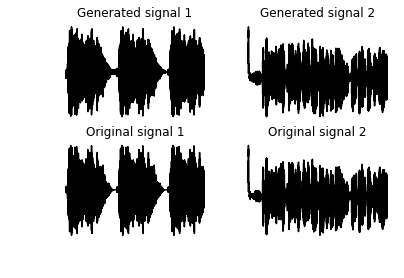

In [10]:
# Now that we have the appropriate signal,
# we proceed to implement fastICA on the source signal 'x'

# Creating random weight vector
w1 = np.random.randn(dim, 1)
w1 = w1 / linalg.norm(w1)

w0 = np.random.randn(dim, 1)
w0 = w0 / linalg.norm(w0)


# Running the fixed-point algorithm, with gradient descent
epsilon = 0.01  # Determines the extent of convergence
alpha = 1  # Step-size for gradient-descent

while abs(abs(w0.T @ w1) - 1) > epsilon:
    w0 = w1
    w1 = (xn @ g(w1.T @ xn).T / n - 
          alpha * np.mean(dg(w1.T) @ xn, axis=1).T * w1)
    w1 = w1 / linalg.norm(w1)

w2 = np.random.randn(dim, 1)
w2 = w2 / linalg.norm(w2)

w0 = np.random.randn(dim, 1)
w0 = w0 / linalg.norm(w0)

while abs(abs(w0.T @ w2) - 1) > epsilon:
    w0 = w2
    w2 = (xn @ g(w2.T @ xn).T / n - 
          alpha * np.mean(dg(w2.T) @ xn, axis=1).T * w2)
    w2 = w2 - (w2.T @ w1) * w1
    w2 = w2 / linalg.norm(w2)

# Forming the source signal matrix
s = np.c_[w1, w2].T @ x

# Plot the separated sources.
time = np.arange(0, n, 1)
time = time / samplingRate
time = time * 1000  # convert to milliseconds

plt.figure()
plt.subplot(2, 2, 1).set_axis_off()
plt.plot(time, s[0, :], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 1")

plt.subplot(2, 2, 2).set_axis_off()
plt.plot(time, s[1, :], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 2")

# Plot the actual sources for comparison.
samplingRate, orig1 = wavfile.read('fastICA/source1.wav')
orig1 = orig1 / 255.0 - 0.5  # uint8 takes values from 0 to 255

plt.subplot(2,2, 3).set_axis_off()
plt.plot(time, orig1, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 1")

samplingRate, orig2 = wavfile.read('fastICA/source2.wav')
orig2 = orig2 / 255.0 - 0.5  # uint8 takes values from 0 to 255

plt.subplot(2, 2, 4).set_axis_off()
plt.plot(time, orig2, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 2")

But a good way to represent the audio files is through a spectrogram (short time fourier transform), google this if you dont know what this means. So we plot the spectrograms of our separation.

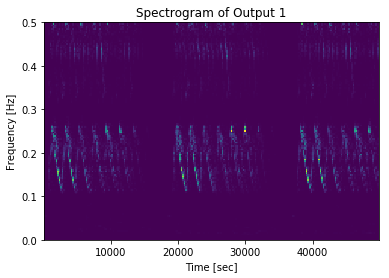

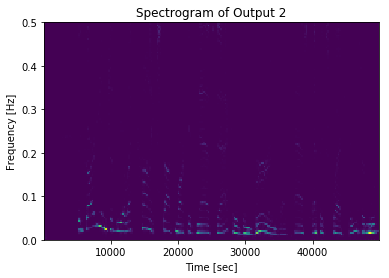

In [12]:
plt.figure()
f, t, S = signal.spectrogram(s[0, :])
plt.pcolormesh(t, f, S)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Output 1')

plt.figure()
f, t, S = signal.spectrogram(s[1, :])
plt.pcolormesh(t, f, S)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Output 2')

# Storing numpy array as audio
wavfile.write('fastICA/out1.wav', samplingRate, np.transpose(s[0,:]))
wavfile.write('fastICA/out2.wav', samplingRate, np.transpose(s[1, :]))

In [13]:
from IPython.display import Audio
print('Mixed Signal 1')
Audio("fastICA/mic1.wav")

Mixed Signal 1


In [3]:
print('Mixed Signal 2')
Audio("fastICA/mic2.wav")

Mixed Signal 2


In [4]:
print('Original separated signal 1')
Audio("fastICA/source1.wav")

Original separated signal 1


In [5]:
print('Original separated signal 2')
Audio("fastICA/source2.wav")

Original separated signal 2


In [14]:
print('Separated signal 1 (output)')
Audio("fastICA/out1.wav")

Separated signal 1 (output)


In [15]:
print('Separated signal 2 (output)')
Audio("fastICA/out2.wav")

Separated signal 2 (output)


## <font color='blue'>FOBI</font>

FOBI stands for Fourth Order Blind Identification. 

As the name suggests, it is based on considering fourth order moments and using them as a metric for Gaussianity. 
Covariance, variance and the covariance matrix are second order moments. 
Fourth order moments are usually referred to by the term kurtosis. There are other ICA methods that explicitly work with kurtosis, but not so with FOBI. 

FOBI is a very elegant method that works without the need to search a solution space for the indepenedent components(as is the case with fastICA and other negentropy or maximum-likelihood based ICA approaches). Rather, it provides an explicit algebraic formula for the independent components. 

It has some striking and appealing similarities to PCA. FOBI is based on the following amazing fact:

**The weights of the independent components are the eigenvectors of the matrix $cov(|X'|X')$. **

The statement requires some explanation. 
$X'$ is the matrix obtained after preprocessing $X$ (mean-centered and whitened).

$|X'|$ needs to be explained. Remember that each column of $X'$ corresponds to the (whitened) set of amplitudes recorded at some instant of time by the **m** microphones. If we take this column to be a vector, then the norm (aka the modulus) of this vector is well defined. We find the norm of each column of **X'** and put these calculated norms in a row matrix. This is the matrix $|X'|$. 
Hence, $|X'|$ is simply the norm of the matrix $X$ taken along the "column-axis".

But here comes a caveat: The matrix $|X'|X'$ is not formed by the normal matrix multiplication between $|X'|$ and $X'$. We have written it this way only for notational convnenience. Instead, we are using the elements of $|X'|$ as weights for the columns of $X'$. That is, the matrix $|X'|X'$ is formed as follows:

The **i**th column of $|X'|X'$ is formed by a scalar multiplication of the **i**th element of the **1 x m** row matrix $|X'|$ with the **i**th column of the **m x n** matrix $X'$ (each element within this column is thus multiplied by the same scalar value equal to the **i**th element of $|X'$).   

Hence, $|X'|X'$ is a weighted version of $X'$. It is easy to think of each column of $X'$ as a vector in an m-dimensional space. Then $|X'|$ contains the norms of the **m** columns of $X'$ i.e vectors. Multiplying each vector (column) by it's norm and storing these column vectors as columns in a new matrix yields $|X'|X'$.

And what does the statement itself mean? Well, remember how we said that $X = AS$. After whitening, we can say that $X' = A'S'$.
Here, $S'$ corresponds to the source signals itself, but their amplitude has been normalised. (Recall how ICA can only recover the signals upto to a multiplicative factor.)  

The columns of $A'$ are the weights being referred to in the statement above. They are called weights because the each row of $S'$ is a source signal. Upon performing matrix multiplication between $A'$ and $S'$, we can see that $X' = \sum_{1}^{m}A'_{i}S'_{i}$. Note that $A'_{i}$ are column vectors and $S'_{i}$ are row vectors. Hence, the columns of $A'$ act as weights for the source signals. 

Hence, FOBI allows us to directly compute the matrix $A'$ which as expected, turns out to be orthogonal. (The result says that the columns of $A'$ are orthogonal eigenvectors of the matrix $cov(|X'|X')$. Hence, $A'$ is an orthogonal matrix.) Finding the signals is now trivial. $S' = A'^{-1}X' = A'^{T}X'$. (The inverse of an orthogonal matrix is simply it's transpose.)

Recall that in PCA, the principal components were eigenvectors of the matrix $cov(X)$ and they were all orthogonal. Here, the columns of $A'$, which are the weights for the source signals are the eigenvectors of the matrix  $cov(|X'|X')$. And the weights are orthogonal to one another! 

The proof of this result and a good explanation of the FOBI algorithm can be found in the original paper by the inventor of the FOBI algorithm Jean Cardoso, [here](http://perso.telecom-paristech.fr/~Cardoso/Papers.PDF/icassp89.pdf). The notation used in the paper is rather different from the one that we have been using so far and can be rather confusing. The proof itself is however extremely elegant. 

Also, refer to the paper to better understand why it involves fourth order moments. Basically, if $X'$ were a simple vector, then $cov(|X'|X')$ is fourth order in $X'$. This extends to $X'$ being a matrix.

So the FOBI algorithm in summary is:  

1) Obtain the data matrix *X*.

2) Subtract off the mean to center *X*.

3) Whiten the matrix *X* to obtain the matrix *X'*.

4) Compute the matrix  $cov(|X'|X')$. 

5) Find the eigenvectors of  $cov(|X'|X')$.

6) Store the eigenvectors as columns of a matrix $Y$. ($Y$ is just $A'$)

7) Retrieve the original signals as $S' = Y^{T}X'$. 


The code for the solvong the Cocktail Party Problem based on the FOBI algorithm is given below. In the code, we have used slightly different notation in some places. For instance, x for X and xn for X'. 

Sampling rate = 8000
Data type is uint8
Number of samples: 50000


Text(0.5,1,'Whitened data')

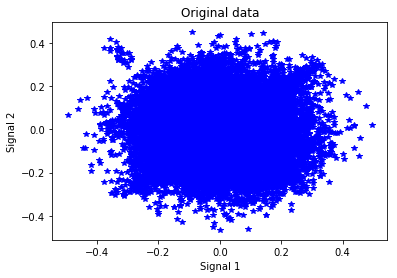

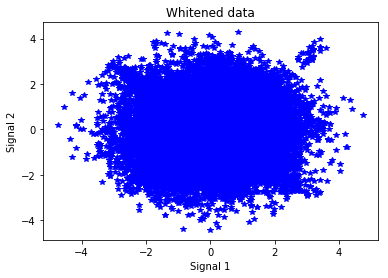

In [26]:
"""
Cocktail Party Problem solved via Independent Component Analysis.
The Fourth Order Blind Identification(FOBI) ICA is implemented here.
"""

# Input the data from the first receiver.
samplingRate, signal1 = wavfile.read('FOBI/Sounds/mix1.wav')
print("Sampling rate = {}".format(samplingRate))
print("Data type is {}".format(signal1.dtype))

# Convert the signal so that amplitude lies between 0 and 1.
signal1 = signal1 / 255.0 - 0.5  # uint8 takes values from 0 to 255

# Output information about the sound samples.
n = signal1.shape[0]
print("Number of samples: {}".format(n))
n = n * 1.0

# Input data from the second receiver and standardise it's amplitude.
samplingRate, signal2 = wavfile.read('FOBI/Sounds/mix2.wav')
signal2 = signal2 / 255.0 - 0.5  # uint8 takes values from 0 to 255

# x is our initial data matrix.
x = np.c_[signal1, signal2].T

# Plot the signals from both sources to show correlations in the data.
plt.figure()
plt.plot(x[0, :], x[1, :], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Original data")

# Calculate the covariance matrix of the initial data.
cov = np.cov(x)

# Calculate eigenvalues and eigenvectors of the covariance matrix.
d, E = linalg.eigh(cov)
# Generate a diagonal matrix with the eigenvalues as diagonal elements.
D = np.diag(d)

Din = linalg.sqrtm(linalg.inv(D))
# Perform whitening. xn is the whitened matrix.
xn = Din @ (E.T @ x)

# Plot whitened data to show new structure of the data.
plt.figure()
plt.plot(xn[0, :], xn[1, :], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Whitened data")


Text(0.5,1,'Original signal 2')

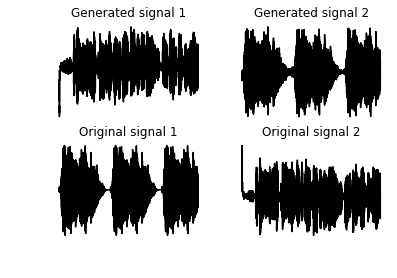

In [29]:
# Perform FOBI.
norm_xn = linalg.norm(xn, axis=0)
norm = np.c_[norm_xn, norm_xn].T

cov2 = np.cov(np.multiply(norm, xn))

d_n, Y = linalg.eigh(cov2)

source = Y.T @ xn

# Plot the separated sources.
time = np.arange(0, n, 1)
time = time / samplingRate
time = time * 1000  # convert to milliseconds

plt.figure()
plt.subplot(2, 2, 1).set_axis_off()
plt.plot(time, source[0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 1")

plt.subplot(2, 2, 2).set_axis_off()
plt.plot(time, source[1], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 2")

# Plot the actual sources for comparison.
samplingRate, orig1 = wavfile.read('FOBI/Sounds/source1.wav')
orig1 = orig1 / 255.0 - 0.5  # uint8 takes values from 0 to 255

plt.subplot(2, 2, 3).set_axis_off()
plt.plot(time, orig1, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 1")

samplingRate, orig2 = wavfile.read('FOBI/Sounds/source2.wav')
orig2 = orig2 / 255.0 - 0.5  # uint8 takes values from 0 to 255

plt.subplot(2, 2, 4).set_axis_off()
plt.plot(time, orig2, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 2")

Again we plot the spectrograms

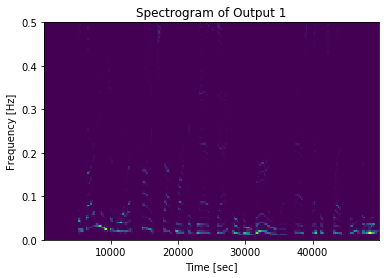

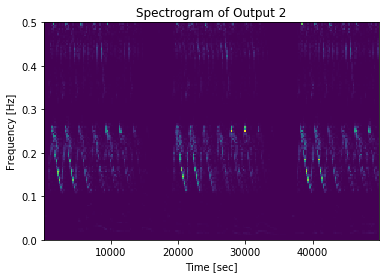

In [30]:
plt.figure()
f, t, S = signal.spectrogram(source[0])
plt.pcolormesh(t, f, S)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Output 1')

plt.figure()
f, t, S = signal.spectrogram(source[1])
plt.pcolormesh(t, f, S)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Output 2')

# Storing numpy array as audio
wavfile.write('FOBI/Sounds/out1.wav', samplingRate, np.transpose(source[0]))
wavfile.write('FOBI/Sounds/out2.wav', samplingRate, np.transpose(source[1]))

In [31]:
from IPython.display import Audio
print('Mixed Signal 1')
Audio("FOBI/Sounds/mix1.wav")

Mixed Signal 1


In [32]:
print('Mixed Signal 2')
Audio("FOBI/Sounds/mix2.wav")

Mixed Signal 2


In [33]:
print('Original separated sound 1')
Audio("FOBI/Sounds/source1.wav")

Original separated sound 1


In [34]:
print('Original separated sound 2')
Audio("FOBI/Sounds/source2.wav")

Original separated sound 2


In [35]:
print('Separated signal 1 (output)')
Audio("FOBI/Sounds/out1.wav")

Separated signal 1 (output)


In [36]:
print('Separated signal 1 (output)')
Audio("FOBI/Sounds/out2.wav")

Separated signal 1 (output)


### fastICA v/s FOBI

The comparison of different implementations of ICA is very difficult as there are few parameters available to quantify and compare performance, and even then no one algorithm performs better unilaterally in all scenarios. Such metrics are usually thus compiled for data from highly specific domains. 

However, some broad conclusions have been drawn based on the asymptotic behaviour of algorithms.

Alogrithms can be categorised on the basis of how of how Gaussianity is quantified. 

fastICA is based on negentropy. Maximum-likelihood and negenrtropy are considered optimal in their statistical properties. However, nengentropy is very computationally expensive to compute if the actual formula is used without any approximations. Hence, in practice, approximate formulae for negentropy are used. These approximations are a compromise between computational speed and statistical properties. 

FOBI does not explicitly use a cost function at all. It provides a purely algebraic method of implementing ICA. Yet, it's statistical properties are essentially that of Kurtosis and it implicitly uses fourth order moments. Kurtosis suffers from non-optimal dependence on outliers. FOBI in particular also involves a lot of matrix computations that might not scale well with the size of the data. 


## Limitations of ICA

ICA generates the independent components upto a scaling factor. This means that the output can also be 'flipped' due to scaling by a negative number. This does not matter when it comes to sound signals but may be a problem to be rectified in other applications of ICA. 

ICA works very well when there is no noise. Noisy ICA methods have been developed that assume a Gaussian pdf for the noise. This is a reasonabel assumption to make in most cases but does not hold always hold.

Feature extraction using ICA may not give the best results. This is true of face recognition in particular. Real images have a lot of variations in parameters that don't really matter in feature extraction. Like brightness. ICA is not 'smart' and will identify brightness also as an Independent component. Also, in higher dimensional data like faces, independent components may not form the best basis of understanding data. For face-recognition, due to the limitations of ICA, Fischer Linear Discriminant Analysis(LDA) is used instead.  

ICA works on linear models. Extending ICA to non-linear systems is much harder to do and is yet to have been solved for a general non-linear system. 

Often, the components estimated from data by an ICA algorithm are not independent. While the components are assumed to be independent in the model, the model does not have enough parameters to actually make the components independent for any given random vector **X**. This is because statistical independence is a very strong property with potentially an infinite number of degrees of freedom.

Empirical results tend to show that ICA estimation seems to be rather robust against some violations of the independence assumption. Modelling dependencies of the estimated components is an important extension of the analysis provided by ICA. It can give useful information on the interactions between the components or sources recovered by ICA. Thus, the fact that the components are dependent can be a great opportunity for gaining further insights into the structure of the data.

## Conclusion

It is fair to say that ICA has become a standard tool in machine learning and signal processing. The generality and potential usefulness of the model were never in question, but in the early days of ICA, there was some doubt about the adequacy of the assumptions of non-Gaussianity and independence. 

It has been realized that non-Gaussianity is in fact quite widespread in any application dealing with scientific measurement devices (as opposed to, for example, data in the social and human sciences). On the other hand, independence is now being seen as a useful approximation that is hardly ever strictly true. Fortunately, it does not need to be strictly true because most ICA methods are relatively robust regarding some dependence of the components.

## References

A great tutorial on PCA:

https://arxiv.org/pdf/1404.1100.pdf

Quick explanation of ICA:

http://research.ics.aalto.fi/ica/icademo/

Comprehensive introductions to ICA: 

http://www.dsp.pub.ro/articles/spie/ICA_course.PDF

http://www.bsp.brain.riken.jp/ICApub/NN00.pdf


ICA implemented using Neural Networks:

https://www.cs.purdue.edu/homes/dgleich/projects/pca_neural_nets_website/

http://shulgadim.blogspot.in/search/label/DSP

